In [1]:
#Project 2, Case 2
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [2]:
#Prescribed Right Wall Temperature
T_r = 300

In [3]:
#Physical Constants of the System
h = 100
k = 10
T_inf = 550
w = 0.1
l = 0.1

In [4]:
#Additional Variables
xdiv = 100
ydiv = 100
dx = l/(xdiv-1)
dy = w/(ydiv-1)
x = np.linspace(0,l,xdiv)
y = np.linspace(0,w,ydiv)

In [5]:
#Make an empty coefficient matrix
A = np.zeros(shape=(xdiv*ydiv, xdiv*ydiv))
#Make an empty vector
B = np.zeros(shape=(xdiv*ydiv, 1))

In [10]:
indices = []
for i in range(xdiv*ydiv):
    indices.append(i+1)
for i in indices:
    if i == 1:
        A[i-1,i-1] = 1
        B[i-1] = T_r
    elif i == xdiv:
        A[i-1,i-1] = 1
        B[i-1] = T_r
    elif i < xdiv:
        A[i-1,i-1] = 1
        B[i-1] = T_r
    elif i == ((xdiv*ydiv)-(xdiv)):
        A[i-1,i-1] = -2*(h*dx/k+1)
        A[i-1,i] = 1
        A[i-1,i-xdiv-1] = 1
        B[i-1] = -2*h*dx*T_inf/k
    elif i == ((xdiv*ydiv)):
        A[i-1,i-1] = -2*(h*dx/k+1)
        A[i-1,i-2] = 1
        A[i-1,i-xdiv-1] = 1
        B[i-1] = -2*h*dx*T_inf/k
    elif i > ((xdiv*ydiv)-(xdiv)):
        A[i-1,i-1] = -2*(h*dx/k+2)
        A[i-1,i-2] = 1
        A[i-1,i] = 1
        A[i-1,i-xdiv-1] = 2
        B[i-1] = -2*h*dx*T_inf/k
    elif i%xdiv == 0:
        A[i-1,i-1]=4
        A[i-1,i-2] = -2
        A[i-1,i-xdiv-1] = -1
        A[i-1,i+xdiv-1] = -1
        B[i-1]=0
    elif (i-1)%xdiv == 0:
        A[i-1,i-1]=4
        A[i-1,i] = -2
        A[i-1,i-xdiv-1] = -1
        A[i-1,i+xdiv-1] = -1
        B[i-1]=0
    else:
        A[i-1,i-1] = 4
        A[i-1,i] = -1
        A[i-1,i-2] = -1
        A[i-1,i+xdiv-1] = -1
        A[i-1,i-xdiv-1] = -1
        B[i-1] = 0

In [21]:
#Find the vector C such that AC=B
C = np.linalg.solve(A,B)
#Rearrange into a 100x100 matrix
D = np.resize(C,(xdiv,ydiv))
#Flip the matrix to the correct orientation
D = np.flipud(D)
#Rotate so that the convective wall is on the left per the instructions
D = np.rot90(D,k=3,axes=(1,0))
print(D)

[[428.35746795 426.64011065 424.81739863 ... 302.54111544 301.27055695
  300.        ]
 [427.61740035 426.21197596 424.68631522 ... 302.54111389 301.27055617
  300.        ]
 [427.21580578 425.90407761 424.51041316 ... 302.54110926 301.27055386
  300.        ]
 ...
 [425.65094376 424.37412708 423.08397135 ... 302.53645948 301.26823016
  300.        ]
 [425.74970646 424.43353572 423.11663168 ... 302.53645695 301.26822889
  300.        ]
 [425.9707037  424.49367767 423.13693554 ... 302.5364561  301.26822847
  300.        ]]


Text(0.5, 1.0, '100 x 100 Grid FDM Solution, Case 2')

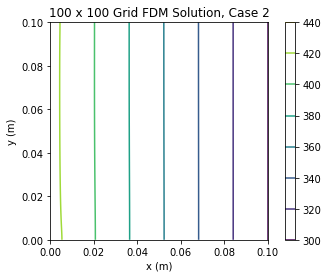

In [22]:
#Make a 2D Contour Plot
plt.contour(x,y,D)
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.title('100 x 100 Grid FDM Solution, Case 2')